In [3]:
from modules.utils_data import read_sdf
import pandas as pd
from functools import reduce
import os
import numpy as np

In [4]:
# No information on splits: 'Clint' and 'FU'

training_data = {
    'LogVP': 'OPERA_splits/OPERA_VP/TR_VP_2034.sdf',
    'LogP': 'OPERA_splits/OPERA_LogP/TR_LogP_10537.sdf',
    'LogOH': 'OPERA_splits/OPERA_AOH/TR_AOH_516.sdf',
    'LogBCF': 'OPERA_splits/OPERA_BCF/TR_BCF_469.sdf',
    'LogHalfLife': 'OPERA_splits/OPERA_BioHL/TR_BioHL_112.sdf',
    'BP': 'OPERA_splits/OPERA_BP/TR_BP_4077.sdf',
    'LogHL': 'OPERA_splits/OPERA_HL/TR_HL_441.sdf',
    'LogKmHL': 'OPERA_splits/OPERA_KM/TR_KM_405.sdf',
    'LogKOA': 'OPERA_splits/OPERA_KOA/TR_KOA_202.sdf',
    'LogKOC': 'OPERA_splits/OPERA_KOC/TR_KOC_545.sdf',
    'MP': 'OPERA_splits/OPERA_MP/TR_MP_6486.sdf',
    'LogMolar': 'OPERA_splits/OPERA_WS/TR_WS_3158.sdf',
}

test_data = {
    'LogVP': 'OPERA_splits/OPERA_VP/TST_VP_679.sdf',
    'LogP': 'OPERA_splits/OPERA_LogP/TST_LogP_3513.sdf',
    'LogOH': 'OPERA_splits/OPERA_AOH/TST_AOH_176.sdf',
    'LogBCF': 'OPERA_splits/OPERA_BCF/TST_BCF_157.sdf',
    'LogHalfLife': 'OPERA_splits/OPERA_BioHL/TST_BioHL_38.sdf',
    'BP': 'OPERA_splits/OPERA_BP/TST_BP_1358.sdf',
    'LogHL': 'OPERA_splits/OPERA_HL/TST_HL_150.sdf',
    'LogKmHL': 'OPERA_splits/OPERA_KM/TST_KM_136.sdf',
    'LogKOA': 'OPERA_splits/OPERA_KOA/TST_KOA_68.sdf',  
    'LogKOC': 'OPERA_splits/OPERA_KOC/TST_KOC_184.sdf',
    'MP': 'OPERA_splits/OPERA_MP/TST_MP_2167.sdf',
    'LogMolar': 'OPERA_splits/OPERA_WS/TST_WS_1066.sdf',
}

data = []
for d in [training_data, test_data]:
    # Read SDF files and extract data
    data_dict = {prop: read_sdf(path, prop) for prop, path in d.items()}

    # Create Pandas dataframes
    df_dict = {prop: pd.DataFrame(data) for prop, data in data_dict.items()}

    #for eaach df in df_dict, remove duplicates
    for df in df_dict.values():
        df.drop_duplicates(subset='SMILES', inplace=True)

    df_data = reduce(lambda left, right: pd.merge(left, right, on='SMILES', how='outer'), [df[['SMILES', prop]] for prop, df in df_dict.items()])
    df_data = df_data[['SMILES'] + list(df_dict.keys())]
    data.append(df_data)

train = data[0]
test = data[1]

properties = train.drop(columns='SMILES').columns

Reading OPERA_splits/OPERA_VP/TR_VP_2034.sdf


100%|██████████| 2034/2034 [00:00<00:00, 6058.29it/s]


Reading OPERA_splits/OPERA_LogP/TR_LogP_10537.sdf


 11%|█         | 1184/10537 [00:00<00:01, 5994.83it/s][17:59:41] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:59:41] ERROR: Could not sanitize molecule ending on line 146438
[17:59:41] ERROR: Explicit valence for atom # 1 N, 4, is greater than permitted
 17%|█▋        | 1784/10537 [00:00<00:01, 5868.80it/s][17:59:41] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:59:41] ERROR: Could not sanitize molecule ending on line 233170
[17:59:41] ERROR: Explicit valence for atom # 1 N, 4, is greater than permitted
 34%|███▎      | 3549/10537 [00:00<00:01, 5478.11it/s][17:59:42] Explicit valence for atom # 8 N, 4, is greater than permitted
[17:59:42] ERROR: Could not sanitize molecule ending on line 400722
[17:59:42] ERROR: Explicit valence for atom # 8 N, 4, is greater than permitted
[17:59:42] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:59:42] ERROR: Could not sanitize molecule ending on line 406654
[17:59:42] ERROR: Explicit valence

Reading OPERA_splits/OPERA_AOH/TR_AOH_516.sdf


100%|██████████| 516/516 [00:00<00:00, 8454.38it/s]


Reading OPERA_splits/OPERA_BCF/TR_BCF_469.sdf


100%|██████████| 469/469 [00:00<00:00, 5120.42it/s]


Reading OPERA_splits/OPERA_BioHL/TR_BioHL_112.sdf


100%|██████████| 112/112 [00:00<00:00, 4782.85it/s]


Reading OPERA_splits/OPERA_BP/TR_BP_4077.sdf


100%|██████████| 4077/4077 [00:00<00:00, 6816.34it/s]


Reading OPERA_splits/OPERA_HL/TR_HL_441.sdf


100%|██████████| 441/441 [00:00<00:00, 7110.25it/s]


Reading OPERA_splits/OPERA_KM/TR_KM_405.sdf


100%|██████████| 405/405 [00:00<00:00, 5368.10it/s]


Reading OPERA_splits/OPERA_KOA/TR_KOA_202.sdf


100%|██████████| 202/202 [00:00<00:00, 6821.60it/s]


Reading OPERA_splits/OPERA_KOC/TR_KOC_545.sdf


100%|██████████| 545/545 [00:00<00:00, 5362.42it/s]


Reading OPERA_splits/OPERA_MP/TR_MP_6486.sdf


100%|██████████| 6486/6486 [00:01<00:00, 5044.71it/s]


Reading OPERA_splits/OPERA_WS/TR_WS_3158.sdf


100%|██████████| 3158/3158 [00:00<00:00, 5377.97it/s]


Reading OPERA_splits/OPERA_VP/TST_VP_679.sdf


100%|██████████| 679/679 [00:00<00:00, 6160.41it/s]


Reading OPERA_splits/OPERA_LogP/TST_LogP_3513.sdf


 66%|██████▋   | 2332/3513 [00:00<00:00, 4889.90it/s][17:59:47] Explicit valence for atom # 7 N, 4, is greater than permitted
[17:59:47] ERROR: Could not sanitize molecule ending on line 297018
[17:59:47] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
100%|██████████| 3513/3513 [00:00<00:00, 4637.30it/s]


Reading OPERA_splits/OPERA_AOH/TST_AOH_176.sdf


100%|██████████| 176/176 [00:00<00:00, 8343.76it/s]


Reading OPERA_splits/OPERA_BCF/TST_BCF_157.sdf


100%|██████████| 157/157 [00:00<00:00, 5510.78it/s]


Reading OPERA_splits/OPERA_BioHL/TST_BioHL_38.sdf


100%|██████████| 38/38 [00:00<00:00, 4821.18it/s]


Reading OPERA_splits/OPERA_BP/TST_BP_1358.sdf


100%|██████████| 1358/1358 [00:00<00:00, 7193.86it/s]


Reading OPERA_splits/OPERA_HL/TST_HL_150.sdf


100%|██████████| 150/150 [00:00<00:00, 6889.39it/s]


Reading OPERA_splits/OPERA_KM/TST_KM_136.sdf


100%|██████████| 136/136 [00:00<00:00, 5092.67it/s]


Reading OPERA_splits/OPERA_KOA/TST_KOA_68.sdf


100%|██████████| 68/68 [00:00<00:00, 6379.88it/s]


Reading OPERA_splits/OPERA_KOC/TST_KOC_184.sdf


100%|██████████| 184/184 [00:00<00:00, 4783.00it/s]


Reading OPERA_splits/OPERA_MP/TST_MP_2167.sdf


100%|██████████| 2167/2167 [00:00<00:00, 4960.18it/s]


Reading OPERA_splits/OPERA_WS/TST_WS_1066.sdf


100%|██████████| 1066/1066 [00:00<00:00, 5566.26it/s]


In [5]:
# Dump data to csv for single task models
for property in properties:
    train_prop = train[['SMILES', property]].dropna().reset_index(drop=True)
    train_prop.to_csv(f'data/train_{property}.csv', index=False)
    test_prop = test[['SMILES', property]].dropna().reset_index(drop=True)
    test_prop.to_csv(f'data/test_{property}.csv', index=False)

In [4]:
# Here is where you train the models
import json

for prop in properties:
    # Optimize HP
    os.system(f'chemprop hpopt --data-path "data/train_{prop}.csv" --task-type regression --num-workers 15')

    # Train
    optimized_params = json.load(open(f"chemprop_hpopt/train_{prop}/best_params.json"))["train_loop_config"]
    os.system(f'''chemprop train \
    --data-path "data/train_{prop}.csv" \
    --task-type regression \
    --output-dir "chemprop_out/{prop}" \
    --num-workers 15 \
    --epochs 100 \
    --dropout {optimized_params["dropout"]} \
    --ffn-num-layers {optimized_params["ffn_num_layers"]} \
    --ffn-hidden-dim {optimized_params["ffn_hidden_dim"]} \
    --depth {optimized_params["depth"]} \
    --message-hidden-dim {optimized_params["message_hidden_dim"]}''')

    # Predict
    os.system(f'''chemprop predict \
    --test-path "$data/test_{prop}.csv" \
    --model-path "$chemprop_out/{prop}/model_0/best.pt" \
    --preds-path "$chemprop_out/{prop}.csv" \
    --num-workers 15''')

/localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'graph_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['graph_transform'])`.
/localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'output_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_transform'])`.
2024-05-21 17:55:47,125	INFO worker.py:1749 -- Started a local Ray instance.
2024-05-21 17:55:47,744	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.
2024-05-21 17:55:47,765	INFO data_parallel_trainer.py:340 -- GPUs are detected in your Ray cluster, but GPU training is not enabled

╭─────────────────────────────────────────────────────────────────────╮
│ Configuration for experiment     TorchTrainer_2024-05-21_17-55-45   │
├─────────────────────────────────────────────────────────────────────┤
│ Search algorithm                 SearchGenerator                    │
│ Scheduler                        AsyncHyperBandScheduler            │
│ Number of trials                 10                                 │
╰─────────────────────────────────────────────────────────────────────╯

View detailed results here: /localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-05-21_17-55-45_548723_3576288/artifacts/2024-05-21_17-55-47/TorchTrainer_2024-05-21_17-55-45/driver_artifacts`

Trial status: 1 PENDING
Current time: 2024-05-21 17:55:47. Total running time: 0s
Logical resource usage: 2.0/16 CPUs, 0/1 GPUs (0.0/1.0 accelerator_ty

2024-05-21 17:55:51,226	INFO data_parallel_trainer.py:340 -- GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.
(TorchTrainer pid=3577368) GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.
(RayTrainWorker pid=3577462) Setting up process group for: env:// [rank=0, world_size=1]
(TorchTrainer pid=3577368) Started distributed worker processes: 
(TorchTrainer pid=3577368) - (ip=129.132.218.175, pid=3577462) world_rank=0, local_rank=0, node_rank=0
(RayTrainWorker pid=3577462) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'graph_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters


Trial TorchTrainer_8f757770 started with configuration:
╭─────────────────────────────────────────────╮
│ Trial TorchTrainer_8f757770 config          │
├─────────────────────────────────────────────┤
│ train_loop_config/depth                   6 │
│ train_loop_config/dropout              0.25 │
│ train_loop_config/ffn_hidden_dim        500 │
│ train_loop_config/ffn_num_layers          3 │
│ train_loop_config/message_hidden_dim   2400 │
╰─────────────────────────────────────────────╯


(RayTrainWorker pid=3577462) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (26) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
(RayTrainWorker pid=3577462) 
(RayTrainWorker pid=3577462)   | Name            | Type               | Params
(RayTrainWorker pid=3577462) -------------------------------------------------------
(RayTrainWorker pid=3577462) 0 | message_passing | BondMessagePassing | 318 K 
(RayTrainWorker pid=3577462) 1 | agg             | MeanAggregation    | 0     
(RayTrainWorker pid=3577462) 2 | bn              | BatchNorm1d        | 600   
(RayTrainWorker pid=3577462) 3 | predictor       | RegressionFFN      | 90.6 K
(RayTrainWorker pid=3577462) 4 | X_d_transform   | Identity           | 0     
(RayTrainWorker pid=3577462) -------------------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 0:   0%|          | 0/26 [00:00<?, ?it/s]                            


(RayTrainWorker pid=3577462) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val/mse', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
(RayTrainWorker pid=3577462) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val_loss', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.


Epoch 0: 100%|██████████| 26/26 [00:01<00:00, 16.05it/s, v_num=0, train_loss=0.316]


(TorchTrainer pid=3577463) GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.


(RayTrainWorker pid=3577462) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  25%|██▌       | 1/4 [00:00<00:00, 30.07it/s]
(RayTrainWorker pid=3577462) 
Epoch 1:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.316, val_loss=0.754]         


(RayTrainWorker pid=3577462) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_9df62d9d_1_depth=5.0000,dropout=0.2000,ffn_hidden_dim=2100.0000,ffn_num_layers=3.0000,message_hidden_dim=2200.0000_2024-05-21_17-55-47/checkpoint_000000)


Epoch 1:  54%|█████▍    | 14/26 [00:01<00:01, 11.63it/s, v_num=0, train_loss=0.195, val_loss=0.754]

Trial TorchTrainer_26a101ac started with configuration:
╭─────────────────────────────────────────────╮
│ Trial TorchTrainer_26a101ac config          │
├─────────────────────────────────────────────┤
│ train_loop_config/depth                   4 │
│ train_loop_config/dropout               0.3 │
│ train_loop_config/ffn_hidden_dim       1200 │
│ train_loop_config/ffn_num_layers          1 │
│ train_loop_config/message_hidden_dim   1100 │
╰─────────────────────────────────────────────╯


2024-05-21 17:55:58,883	INFO data_parallel_trainer.py:340 -- GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.
(TorchTrainer pid=3577679) GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.
(RayTrainWorker pid=3577696) Setting up process group for: env:// [rank=0, world_size=1]
(TorchTrainer pid=3577463) Started distributed worker processes: 
(TorchTrainer pid=3577463) - (ip=129.132.218.175, pid=3577696) world_rank=0, local_rank=0, node_rank=0


Epoch 0:   0%|          | 0/26 [00:00<?, ?it/s]                            


(RayTrainWorker pid=3577696) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'graph_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['graph_transform'])`.
(RayTrainWorker pid=3577696) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'output_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_transform'])`.
(RayTrainWorker pid=3577696) GPU available: False, used: False
(RayTrainWorker pid=3577696) TPU available: False, using: 0 TPU cores
(RayTrainWorker pid=3577696) IPU available: False, using: 0 IPUs
(RayTrainWorker pid=3577696) HPU available: False, using: 0 HPUs
(RayTrainWorker pid=3577696) Missing logger folder: /

(RayTrainWorker pid=3577462) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  25%|██▌       | 1/4 [00:00<00:00, 22.61it/s]
(RayTrainWorker pid=3577462) 
Epoch 2:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.591, val_loss=0.414]         
Sanity Checking: |          | 0/? [00:00<?, ?it/s]


2024-05-21 17:56:00,148	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(RayTrainWorker pid=3577462) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_9df62d9d_1_depth=5.0000,dropout=0.2000,ffn_hidden_dim=2100.0000,ffn_num_layers=3.0000,message_hidden_dim=2200.0000_2024-05-21_17-55-47/checkpoint_000001)
(RayTrainWorker pid=3577696) /local

Epoch 2:  23%|██▎       | 6/26 [00:00<00:02,  7.06it/s, v_num=0, train_loss=0.182, val_loss=0.414]


(TorchTrainer pid=3577679) Started distributed worker processes: 
(TorchTrainer pid=3577679) - (ip=129.132.218.175, pid=3578856) world_rank=0, local_rank=0, node_rank=0
(RayTrainWorker pid=3577696) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val/mse', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
(RayTrainWorker pid=3577696) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val_loss', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
(RayTrainWorker pid=3578856) Setting up process group for: env:// [rank=0, world_size=1]
2024-05-21 17:56:02,093	WARNING experiment_state.py:205 -- Experiment state snapsho

Epoch 2: 100%|██████████| 26/26 [00:02<00:00, 12.01it/s, v_num=0, train_loss=0.0782, val_loss=0.414]
(RayTrainWorker pid=3577696)  [repeated 2x across cluster]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 1:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.301, val_loss=0.802]         
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 2: 100%|██████████| 26/26 [00:02<00:00,  9.65it/s, v_num=0, train_loss=0.0782, val_loss=0.162]


2024-05-21 17:56:02,872	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(RayTrainWorker pid=3577462) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_9df62d9d_1_depth=5.0000,dropout=0.2000,ffn_hidden_dim=2100.0000,ffn_num_layers=3.0000,message_hidden_dim=2200.0000_2024-05-21_17-55-47/checkpoint_000002) [repeated 2x across cluster]


Epoch 3:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.0782, val_loss=0.162]         

Trial TorchTrainer_12b4bdb4 started with configuration:
╭─────────────────────────────────────────────╮
│ Trial TorchTrainer_12b4bdb4 config          │
├─────────────────────────────────────────────┤
│ train_loop_config/depth                   4 │
│ train_loop_config/dropout              0.15 │
│ train_loop_config/ffn_hidden_dim       2300 │
│ train_loop_config/ffn_num_layers          2 │
│ train_loop_config/message_hidden_dim   1200 │
╰─────────────────────────────────────────────╯


2024-05-21 17:56:03,592	INFO data_parallel_trainer.py:340 -- GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.
(RayTrainWorker pid=3578856) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'graph_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['graph_transform'])`.
(RayTrainWorker pid=3578856) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'output_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_transform'])`.
(RayTrainWorker pid=3578856) GPU available: False, used: False
(RayTrainWorker pid=

Sanity Checking: |          | 0/? [00:00<?, ?it/s]


(RayTrainWorker pid=3578856) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (26) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
(RayTrainWorker pid=3578856) 
(RayTrainWorker pid=3578856)   | Name            | Type               | Params
(RayTrainWorker pid=3578856) 0 | message_passing | BondMessagePassing | 318 K 
(RayTrainWorker pid=3578856) 1 | agg             | MeanAggregation    | 0     
(RayTrainWorker pid=3578856) 2 | bn              | BatchNorm1d        | 600   
(RayTrainWorker pid=3578856) 3 | predictor       | RegressionFFN      | 90.6 K
(RayTrainWorker pid=3578856) 4 | X_d_transform   | Identity           | 0     
(RayTrainWorker pid=3578856) 409 K     Trainable params
(RayTrainWorker pid=3578856) 0         Non-trainable params
(RayTrainWorker pid=3578856) 409 K     Total pa

Epoch 0:   0%|          | 0/26 [00:00<?, ?it/s]                            


(RayTrainWorker pid=3578856) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val/mse', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
(RayTrainWorker pid=3578856) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val_loss', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
2024-05-21 17:56:05,300	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointC

Epoch 0:  50%|█████     | 13/26 [00:01<00:01, 10.19it/s, v_num=0, train_loss=0.293] [repeated 46x across cluster]


2024-05-21 17:56:06,036	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(TorchTrainer pid=3578855) Started distributed worker processes: 
(TorchTrainer pid=3578855) - (ip=129.132.218.175, pid=3581187) world_rank=0, local_rank=0, node_rank=0
(RayTrainWorker pid=3581187) Setting up process group for: env:// [rank=0, world_size=1]


Epoch 0: 100%|██████████| 26/26 [00:02<00:00, 10.92it/s, v_num=0, train_loss=0.365] [repeated 3x across cluster]


2024-05-21 17:56:07,435	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


(RayTrainWorker pid=3578856)  [repeated 8x across cluster]
Validation DataLoader 0:  75%|███████▌  | 3/4 [00:00<00:00, 30.48it/s] [repeated 12x across cluster]
Validation: |          | 0/? [00:00<?, ?it/s] [repeated 3x across cluster]
Epoch 4:  92%|█████████▏| 24/26 [00:02<00:00,  9.71it/s, v_num=0, train_loss=0.170, val_loss=0.163]


2024-05-21 17:56:08,704	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(RayTrainWorker pid=3577696) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_8f757770_2_depth=6.0000,dropout=0.2500,ffn_hidden_dim=500.0000,ffn_num_layers=3.0000,message_hidden_dim=2400.0000_2024-05-21_17-55-51/checkpoint_000002) [repeated 4x across cluster]
(RayTra


Trial TorchTrainer_d5171343 started with configuration:
╭─────────────────────────────────────────────╮
│ Trial TorchTrainer_d5171343 config          │
├─────────────────────────────────────────────┤
│ train_loop_config/depth                   4 │
│ train_loop_config/dropout                 0 │
│ train_loop_config/ffn_hidden_dim       1300 │
│ train_loop_config/ffn_num_layers          2 │
│ train_loop_config/message_hidden_dim   1500 │
╰─────────────────────────────────────────────╯
Epoch 5:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.0794, val_loss=0.191]         


(RayTrainWorker pid=3581187) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (26) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
(RayTrainWorker pid=3581187) 
(RayTrainWorker pid=3581187)   | Name            | Type               | Params
(RayTrainWorker pid=3581187) 0 | message_passing | BondMessagePassing | 318 K 
(RayTrainWorker pid=3581187) 1 | agg             | MeanAggregation    | 0     
(RayTrainWorker pid=3581187) 2 | bn              | BatchNorm1d        | 600   
(RayTrainWorker pid=3581187) 3 | predictor       | RegressionFFN      | 90.6 K
(RayTrainWorker pid=3581187) 4 | X_d_transform   | Identity           | 0     
(RayTrainWorker pid=3581187) 409 K     Trainable params
(RayTrainWorker pid=3581187) 0         Non-trainable params
(RayTrainWorker pid=3581187) 409 K     Total pa

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 0:   0%|          | 0/26 [00:00<?, ?it/s]                            


(RayTrainWorker pid=3581187) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val/mse', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
(RayTrainWorker pid=3581187) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val_loss', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
(RayTrainWorker pid=3581187) ------------------------------------------------------- [repeated 2x across cluster]


Epoch 3:  58%|█████▊    | 15/26 [00:02<00:01,  6.62it/s, v_num=0, train_loss=0.176, val_loss=0.202] [repeated 80x across cluster]


2024-05-21 17:56:11,159	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 3: 100%|██████████| 26/26 [00:03<00:00,  8.35it/s, v_num=0, train_loss=0.195, val_loss=0.202]  [repeated 4x across cluster]


2024-05-21 17:56:12,434	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(TorchTrainer pid=3581188) Started distributed worker processes: 
(TorchTrainer pid=3581188) - (ip=129.132.218.175, pid=3584349) world_rank=0, local_rank=0, node_rank=0
(RayTrainWorker pid=3584349) Setting up process group for: env:// [rank=0, world_size=1]


(RayTrainWorker pid=3577696)  [repeated 11x across cluster]
Validation DataLoader 0:  75%|███████▌  | 3/4 [00:00<00:00, 28.43it/s] [repeated 12x across cluster]
Validation: |          | 0/? [00:00<?, ?it/s] [repeated 4x across cluster]
Epoch 6:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.226, val_loss=0.252]         


2024-05-21 17:56:13,417	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:56:13,717	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 6:  19%|█▉        | 5/26 [00:01<00:04,  4.45it/s, v_num=0, train_loss=0.210, val_loss=0.252]


2024-05-21 17:56:14,915	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(RayTrainWorker pid=3578856) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_26a101ac_3_depth=4.0000,dropout=0.3000,ffn_hidden_dim=1200.0000,ffn_num_layers=1.0000,message_hidden_dim=1100.0000_2024-05-21_17-55-54/checkpoint_000002) [repeated 6x across cluster]
2024-0


Trial TorchTrainer_9fe15055 started with configuration:
╭─────────────────────────────────────────────╮
│ Trial TorchTrainer_9fe15055 config          │
├─────────────────────────────────────────────┤
│ train_loop_config/depth                   4 │
│ train_loop_config/dropout                 0 │
│ train_loop_config/ffn_hidden_dim       2100 │
│ train_loop_config/ffn_num_layers          2 │
│ train_loop_config/message_hidden_dim   2000 │
╰─────────────────────────────────────────────╯


(TorchTrainer pid=3584348) GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.
(RayTrainWorker pid=3584349) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'graph_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['graph_transform'])`.
(RayTrainWorker pid=3584349) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'output_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_transform'])`.
(RayTrainWorker pid=3584349) GPU available: False, used: False
(RayTrainWorker pid=3584349) TPU available: False, usi

Epoch 3:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.0762, val_loss=0.177] [repeated 2x across cluster]


(RayTrainWorker pid=3584349) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (26) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
(RayTrainWorker pid=3584349) 
(RayTrainWorker pid=3584349)   | Name            | Type               | Params
(RayTrainWorker pid=3584349) -------------------------------------------------------
(RayTrainWorker pid=3584349) 0 | message_passing | BondMessagePassing | 318 K 
(RayTrainWorker pid=3584349) 1 | agg             | MeanAggregation    | 0     
(RayTrainWorker pid=3584349) 2 | bn              | BatchNorm1d        | 600   
(RayTrainWorker pid=3584349) 3 | predictor       | RegressionFFN      | 90.6 K
(RayTrainWorker pid=3584349) 4 | X_d_transform   | Identity           | 0     
(RayTrainWorker pid=3584349) -------------------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 0:   0%|          | 0/26 [00:00<?, ?it/s]                            


(RayTrainWorker pid=3584349) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val/mse', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
(RayTrainWorker pid=3584349) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val_loss', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
2024-05-21 17:56:16,548	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointC

Epoch 4: 100%|██████████| 26/26 [00:03<00:00,  7.81it/s, v_num=0, train_loss=0.0872, val_loss=0.145] [repeated 3x across cluster]


2024-05-21 17:56:17,567	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:56:17,872	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


(RayTrainWorker pid=3581187)  [repeated 14x across cluster]
Validation DataLoader 0:  50%|█████     | 2/4 [00:00<00:00, 14.81it/s] [repeated 17x across cluster]

Trial status: 6 RUNNING | 1 PENDING
Current time: 2024-05-21 17:56:17. Total running time: 30s
Logical resource usage: 14.0/16 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:RTX)
Current best trial: 26a101ac with val_loss=0.1768856942653656 and params={'train_loop_config': {'ffn_num_layers': 1.0, 'depth': 4.0, 'dropout': 0.30000000000000004, 'ffn_hidden_dim': 1200.0, 'message_hidden_dim': 1100.0}}
╭────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────���────────────────────────────────────╮
│ Trial name              status       ...ig/ffn_num_layers     ...loop_config/depth     ...op_config/dropout     ...ig/ffn_hidden_dim     ...essage_hidden_dim     iter     total time (s)     train_los

(TorchTrainer pid=3584348) Started distributed worker processes: 
(TorchTrainer pid=3584348) - (ip=129.132.218.175, pid=3587965) world_rank=0, local_rank=0, node_rank=0
(RayTrainWorker pid=3587965) Setting up process group for: env:// [rank=0, world_size=1]
2024-05-21 17:56:19,133	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 3:  27%|██▋       | 7/26 [00:01<00:04,  4.62it/s, v_num=0, train_loss=0.261, val_loss=0.177] [repeated 4x across cluster]


2024-05-21 17:56:20,056	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(RayTrainWorker pid=3584349) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_d5171343_5_depth=4.0000,dropout=0.0000,ffn_hidden_dim=1300.0000,ffn_num_layers=2.0000,message_hidden_dim=1500.0000_2024-05-21_17-56-03/checkpoint_000000) [repeated 5x across cluster]


Epoch 1:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.367, val_loss=0.803] [repeated 4x across cluster]


2024-05-21 17:56:20,907	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 8:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.0688, val_loss=0.143]         


2024-05-21 17:56:21,798	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(RayTrainWorker pid=3587965) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'graph_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['graph_transform'])`.
(RayTrainWorker pid=3587965) /localhome/eruijsena/.conda/envs/chemprop/


Trial TorchTrainer_229ad303 started with configuration:
╭─────────────────────────────────────────────╮
│ Trial TorchTrainer_229ad303 config          │
├─────────────────────────────────────────────┤
│ train_loop_config/depth                   3 │
│ train_loop_config/dropout                 0 │
│ train_loop_config/ffn_hidden_dim       2100 │
│ train_loop_config/ffn_num_layers          2 │
│ train_loop_config/message_hidden_dim   2200 │
╰─────────────────────────────────────────────╯


2024-05-21 17:56:22,081	INFO data_parallel_trainer.py:340 -- GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.
(RayTrainWorker pid=3587965) GPU available: False, used: False
(RayTrainWorker pid=3587965) TPU available: False, using: 0 TPU cores
(RayTrainWorker pid=3587965) IPU available: False, using: 0 IPUs
(RayTrainWorker pid=3587965) HPU available: False, using: 0 HPUs
(RayTrainWorker pid=3587965) Missing logger folder: /tmp/ray/session_2024-05-21_17-55-45_548723_3576288/artifacts/2024-05-21_17-55-47/TorchTrainer_2024-05-21_17-55-45/working_dirs/TorchTrainer_9fe15055_6_depth=4.0000,dropout=0.0000,ffn_hidden_dim=2100.0000,ffn_num_layers=2.0000,message_hidden_dim=2000.0000_2024-05-21_17-56-09/lightning_logs
(RayTrainWorker pid=3587965) Loading `train_dataloader` to estimate number of stepping batches.
(TorchTrainer pid=3587948) GPUs are detected in your Ray cluster,

Epoch 7: 100%|██████████| 26/26 [00:03<00:00,  7.72it/s, v_num=0, train_loss=0.0688, val_loss=0.212] [repeated 2x across cluster]


2024-05-21 17:56:22,517	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(RayTrainWorker pid=3587965) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (26) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
(RayTrainWorker pid=3587965) 
(RayTrainWorker pid=3587965)   | Name            

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
(RayTrainWorker pid=3581187)  [repeated 17x across cluster]
Validation DataLoader 0:  75%|███████▌  | 3/4 [00:00<00:00,  8.99it/s] [repeated 16x across cluster]
Validation: |          | 0/? [00:00<?, ?it/s] [repeated 5x across cluster]
Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  8.97it/s]


(RayTrainWorker pid=3587965) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val/mse', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
(RayTrainWorker pid=3587965) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val_loss', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.


Epoch 0:   0%|          | 0/26 [00:00<?, ?it/s]                            


2024-05-21 17:56:23,974	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 5:  92%|█████████▏| 24/26 [00:03<00:00,  6.96it/s, v_num=0, train_loss=0.0983, val_loss=0.216]


2024-05-21 17:56:24,870	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 6: 100%|██████████| 26/26 [00:04<00:00,  5.26it/s, v_num=0, train_loss=0.177, val_loss=0.210]


(RayTrainWorker pid=3577696) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_8f757770_2_depth=6.0000,dropout=0.2500,ffn_hidden_dim=500.0000,ffn_num_layers=3.0000,message_hidden_dim=2400.0000_2024-05-21_17-55-51/checkpoint_000006) [repeated 6x across cluster]
(TorchTrainer pid=3587948) Started distributed worker processes: 
(TorchTrainer pid=3587948) - (ip=129.132.218.175, pid=3592800) world_rank=0, local_rank=0, node_rank=0
(RayTrainWorker pid=3592800) Setting up process group for: env:// [rank=0, world_size=1]
2024-05-21 17:56:25,869	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `Checkpo

Epoch 7:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.177, val_loss=0.210] [repeated 3x across cluster]


2024-05-21 17:56:26,877	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:56:27,256	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 8: 100%|██████████| 26/26 [00:04<00:00,  6.29it/s, v_num=0, train_loss=0.125, val_loss=0.143]  [repeated 3x across cluster]


2024-05-21 17:56:27,941	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


(RayTrainWorker pid=3587965)  [repeated 18x across cluster]
Validation DataLoader 0:  50%|█████     | 2/4 [00:00<00:00, 15.37it/s] [repeated 17x across cluster]
Validation: |          | 0/? [00:00<?, ?it/s] [repeated 6x across cluster]
Validation DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 13.85it/s] [repeated 6x across cluster]


2024-05-21 17:56:28,938	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 6:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.225, val_loss=0.246]         


2024-05-21 17:56:29,385	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(RayTrainWorker pid=3592800) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'graph_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['graph_transform'])`.
(RayTrainWorker pid=3592800) /localhome/eruijsena/.conda/envs/chemprop/


Trial TorchTrainer_829bda57 started with configuration:
╭─────────────────────────────────────────────╮
│ Trial TorchTrainer_829bda57 config          │
├─────────────────────────────────────────────┤
│ train_loop_config/depth                   5 │
│ train_loop_config/dropout                 0 │
│ train_loop_config/ffn_hidden_dim       1100 │
│ train_loop_config/ffn_num_layers          3 │
│ train_loop_config/message_hidden_dim   1000 │
╰─────────────────────────────────────────────╯


2024-05-21 17:56:29,644	INFO data_parallel_trainer.py:340 -- GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.
(RayTrainWorker pid=3592800) Missing logger folder: /tmp/ray/session_2024-05-21_17-55-45_548723_3576288/artifacts/2024-05-21_17-55-47/TorchTrainer_2024-05-21_17-55-45/working_dirs/TorchTrainer_229ad303_7_depth=3.0000,dropout=0.0000,ffn_hidden_dim=2100.0000,ffn_num_layers=2.0000,message_hidden_dim=2200.0000_2024-05-21_17-56-15/lightning_logs
(RayTrainWorker pid=3592800) Loading `train_dataloader` to estimate number of stepping batches.
(TorchTrainer pid=3592751) GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]


(RayTrainWorker pid=3592800) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (26) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
(RayTrainWorker pid=3592800) 
(RayTrainWorker pid=3592800)   | Name            | Type               | Params
(RayTrainWorker pid=3592800) -------------------------------------------------------
(RayTrainWorker pid=3592800) 0 | message_passing | BondMessagePassing | 318 K 
(RayTrainWorker pid=3592800) 1 | agg             | MeanAggregation    | 0     
(RayTrainWorker pid=3592800) 2 | bn              | BatchNorm1d        | 600   
(RayTrainWorker pid=3592800) 3 | predictor       | RegressionFFN      | 90.6 K
(RayTrainWorker pid=3592800) 4 | X_d_transform   | Identity           | 0     
(RayTrainWorker pid=3592800) -------------------------------------------------

Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]


(RayTrainWorker pid=3592800) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val/mse', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
(RayTrainWorker pid=3592800) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val_loss', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.


Epoch 5:  96%|█████████▌| 25/26 [00:04<00:00,  6.11it/s, v_num=0, train_loss=0.147, val_loss=0.147]  [repeated 2x across cluster]


2024-05-21 17:56:31,092	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(RayTrainWorker pid=3577696) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_8f757770_2_depth=6.0000,dropout=0.2500,ffn_hidden_dim=500.0000,ffn_num_layers=3.0000,message_hidden_dim=2400.0000_2024-05-21_17-55-51/checkpoint_000007) [repeated 6x across cluster]


Epoch 10:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.0659, val_loss=0.121]        


2024-05-21 17:56:32,182	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 4: 100%|██████████| 26/26 [00:05<00:00,  5.03it/s, v_num=0, train_loss=0.091, val_loss=0.216]


2024-05-21 17:56:32,509	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:56:32,738	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


(RayTrainWorker pid=3587965)  [repeated 23x across cluster]
Validation DataLoader 0:  75%|███████▌  | 3/4 [00:00<00:00, 15.11it/s] [repeated 19x across cluster]
Validation: |          | 0/? [00:00<?, ?it/s] [repeated 6x across cluster]
Epoch 2:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.520, val_loss=0.388] [repeated 2x across cluster]


2024-05-21 17:56:34,370	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(TorchTrainer pid=3592751) Started distributed worker processes: 
(TorchTrainer pid=3592751) - (ip=129.132.218.175, pid=3598192) world_rank=0, local_rank=0, node_rank=0
(RayTrainWorker pid=3598192) Setting up process group for: env:// [rank=0, world_size=1]


Epoch 2:  23%|██▎       | 6/26 [00:01<00:05,  3.66it/s, v_num=0, train_loss=0.154, val_loss=0.388]


2024-05-21 17:56:34,667	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:56:35,379	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 6:  77%|███████▋  | 20/26 [00:03<00:01,  5.52it/s, v_num=0, train_loss=0.123, val_loss=0.246] 


(RayTrainWorker pid=3577696) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_8f757770_2_depth=6.0000,dropout=0.2500,ffn_hidden_dim=500.0000,ffn_num_layers=3.0000,message_hidden_dim=2400.0000_2024-05-21_17-55-51/checkpoint_000008) [repeated 7x across cluster]
2024-05-21 17:56:36,301	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05

Epoch 8: 100%|██████████| 26/26 [00:05<00:00,  5.03it/s, v_num=0, train_loss=0.131, val_loss=0.124] [repeated 3x across cluster]


2024-05-21 17:56:37,858	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:56:38,006	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


(RayTrainWorker pid=3587965)  [repeated 25x across cluster]
Validation DataLoader 0:  75%|███████▌  | 3/4 [00:00<00:00, 13.83it/s] [repeated 21x across cluster]
Validation: |          | 0/? [00:00<?, ?it/s] [repeated 7x across cluster]
Validation DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 17.14it/s] [repeated 7x across cluster]


(RayTrainWorker pid=3598192) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'graph_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['graph_transform'])`.
(RayTrainWorker pid=3598192) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'output_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_transform'])`.
(RayTrainWorker pid=3598192) GPU available: False, used: False
(RayTrainWorker pid=3598192) TPU available: False, using: 0 TPU cores
(RayTrainWorker pid=3598192) IPU available: False, using: 0 IPUs
(RayTrainWorker pid=3598192) HPU available: False, using: 0 HPUs
(RayTrainWorker pid=3598192) Missing logger folder: /

Epoch 10: 100%|██████████| 26/26 [00:04<00:00,  6.21it/s, v_num=0, train_loss=0.157, val_loss=0.121]  [repeated 2x across cluster]
Sanity Checking: |          | 0/? [00:00<?, ?it/s]


(RayTrainWorker pid=3598192) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (26) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
(RayTrainWorker pid=3598192) 
(RayTrainWorker pid=3598192)   | Name            | Type               | Params
(RayTrainWorker pid=3598192) -------------------------------------------------------
(RayTrainWorker pid=3598192) 0 | message_passing | BondMessagePassing | 318 K 
(RayTrainWorker pid=3598192) 1 | agg             | MeanAggregation    | 0     
(RayTrainWorker pid=3598192) 2 | bn              | BatchNorm1d        | 600   
(RayTrainWorker pid=3598192) 3 | predictor       | RegressionFFN      | 90.6 K
(RayTrainWorker pid=3598192) 4 | X_d_transform   | Identity           | 0     
(RayTrainWorker pid=3598192) -------------------------------------------------

Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:00<00:00, 16.96it/s]


(RayTrainWorker pid=3598192) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val/mse', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
(RayTrainWorker pid=3598192) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val_loss', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
2024-05-21 17:56:39,804	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointC

Epoch 0:   0%|          | 0/26 [00:00<?, ?it/s]                            


2024-05-21 17:56:40,034	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 8:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.078, val_loss=0.129] [repeated 4x across cluster]


2024-05-21 17:56:41,024	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 8:  12%|█▏        | 3/26 [00:01<00:09,  2.35it/s, v_num=0, train_loss=0.081, val_loss=0.129] [repeated 156x across cluster]


2024-05-21 17:56:42,020	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(RayTrainWorker pid=3577696) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_8f757770_2_depth=6.0000,dropout=0.2500,ffn_hidden_dim=500.0000,ffn_num_layers=3.0000,message_hidden_dim=2400.0000_2024-05-21_17-55-51/checkpoint_000009) [repeated 7x across cluster]


Epoch 9: 100%|██████████| 26/26 [00:05<00:00,  4.59it/s, v_num=0, train_loss=0.0764, val_loss=0.115] [repeated 2x across cluster]


2024-05-21 17:56:42,915	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


(RayTrainWorker pid=3577462)  [repeated 16x across cluster]
Validation DataLoader 0:  75%|███████▌  | 3/4 [00:00<00:00, 16.07it/s] [repeated 15x across cluster]
Validation: |          | 0/? [00:00<?, ?it/s] [repeated 5x across cluster]
Validation DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 19.77it/s] [repeated 5x across cluster]


2024-05-21 17:56:43,432	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 3: 100%|██████████| 26/26 [00:04<00:00,  5.80it/s, v_num=0, train_loss=0.207, val_loss=0.276]  [repeated 4x across cluster]


2024-05-21 17:56:44,165	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 6:  85%|████████▍ | 22/26 [00:04<00:00,  4.70it/s, v_num=0, train_loss=0.0934, val_loss=0.621] [repeated 2x across cluster]


2024-05-21 17:56:44,909	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 0:  54%|█████▍    | 14/26 [00:02<00:02,  5.87it/s, v_num=0, train_loss=0.260]


2024-05-21 17:56:45,587	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:56:45,754	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 10:  88%|████████▊ | 23/26 [00:04<00:00,  5.29it/s, v_num=0, train_loss=0.071, val_loss=0.115]  [repeated 149x across cluster]


2024-05-21 17:56:46,608	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 3:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.088, val_loss=0.172]         


(RayTrainWorker pid=3577696) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_8f757770_2_depth=6.0000,dropout=0.2500,ffn_hidden_dim=500.0000,ffn_num_layers=3.0000,message_hidden_dim=2400.0000_2024-05-21_17-55-51/checkpoint_000010) [repeated 8x across cluster]
2024-05-21 17:56:47,578	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 10: 100%|██████████| 26/26 [00:05<00:00,  4.72it/s, v_num=0, train_loss=0.145, val_loss=0.126] [repeated 2x across cluster]

Trial status: 8 RUNNING | 1 PENDING
Current time: 2024-05-21 17:56:47. Total running time: 1min 0s
Logical resource usage: 16.0/16 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:RTX)
Current best trial: 9df62d9d with val_loss=0.10100790113210678 and params={'train_loop_config': {'ffn_num_layers': 3.0, 'depth': 5.0, 'dropout': 0.2, 'ffn_hidden_dim': 2100.0, 'message_hidden_dim': 2200.0}}
╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Trial name              status       ...ig/ffn_num_layers     ...loop_config/depth     ...op_config/dropout     ...ig/ffn_hidden_dim     ...essage_hidden_dim     iter     total time (s)     train_loss     val/mse     val_loss     epoch │
├────

2024-05-21 17:56:48,800	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:56:48,830	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 9:  58%|█████▊    | 15/26 [00:03<00:02,  4.86it/s, v_num=0, train_loss=0.0456, val_loss=0.121] [repeated 3x across cluster]


2024-05-21 17:56:50,010	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 5:  19%|█▉        | 5/26 [00:01<00:06,  3.41it/s, v_num=0, train_loss=0.199, val_loss=0.166] 


2024-05-21 17:56:50,397	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 2:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.447, val_loss=0.380] [repeated 4x across cluster]


2024-05-21 17:56:51,446	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 6: 100%|██████████| 26/26 [00:05<00:00,  4.48it/s, v_num=0, train_loss=0.136, val_loss=0.176]

Trial TorchTrainer_26a101ac completed after 10 iterations at 2024-05-21 17:56:51. Total running time: 1min 4s
╭──────────────────────────────────────────────────────────╮
│ Trial TorchTrainer_26a101ac result                       │
├──────────────────────────────────────────────────────────┤
│ checkpoint_dir_name                    checkpoint_000009 │
│ time_this_iter_s                                 6.00422 │
│ time_total_s                                    52.82119 │
│ training_iteration                                    10 │
│ epoch                                                  9 │
│ step                                                 260 │
│ train_loss                                       0.07242 │
│ val/mse                                          0.12987 │
│ val_loss                                         0.12987 │
╰────────────────────────────────────────────────────────

2024-05-21 17:56:51,778	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:56:52,134	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 11: 100%|██████████| 26/26 [00:05<00:00,  4.67it/s, v_num=0, train_loss=0.0568, val_loss=0.110]
(RayTrainWorker pid=3577696)  [repeated 24x across cluster]
Validation DataLoader 0:  75%|███████▌  | 3/4 [00:00<00:00, 20.16it/s] [repeated 24x across cluster]


2024-05-21 17:56:53,196	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(RayTrainWorker pid=3577696) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_8f757770_2_depth=6.0000,dropout=0.2500,ffn_hidden_dim=500.0000,ffn_num_layers=3.0000,message_hidden_dim=2400.0000_2024-05-21_17-55-51/checkpoint_000011) [repeated 8x across cluster]


Validation: |          | 0/? [00:00<?, ?it/s] [repeated 8x across cluster]
Epoch 6: 100%|██████████| 26/26 [00:04<00:00,  5.57it/s, v_num=0, train_loss=0.136, val_loss=0.202]  [repeated 2x across cluster]


2024-05-21 17:56:54,441	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:56:54,708	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 13:  58%|█████▊    | 15/26 [00:03<00:02,  4.27it/s, v_num=0, train_loss=0.0654, val_loss=0.115]


2024-05-21 17:56:55,705	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 9:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.131, val_loss=0.139]         


2024-05-21 17:56:56,151	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 5: 100%|██████████| 26/26 [00:05<00:00,  4.65it/s, v_num=0, train_loss=0.191, val_loss=0.384] [repeated 2x across cluster]


2024-05-21 17:56:56,809	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:56:57,805	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 7: 100%|██████████| 26/26 [00:05<00:00,  4.91it/s, v_num=0, train_loss=0.0779, val_loss=0.169] [repeated 3x across cluster]
(RayTrainWorker pid=3577696)  [repeated 22x across cluster]
Validation DataLoader 0:  25%|██▌       | 1/4 [00:00<00:00, 16.85it/s] [repeated 19x across cluster]


2024-05-21 17:56:58,440	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(RayTrainWorker pid=3577696) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_8f757770_2_depth=6.0000,dropout=0.2500,ffn_hidden_dim=500.0000,ffn_num_layers=3.0000,message_hidden_dim=2400.0000_2024-05-21_17-55-51/checkpoint_000012) [repeated 7x across cluster]


Validation: |          | 0/? [00:00<?, ?it/s] [repeated 7x across cluster]
Epoch 3:  92%|█████████▏| 24/26 [00:03<00:00,  6.36it/s, v_num=0, train_loss=0.109, val_loss=0.182]


2024-05-21 17:56:59,974	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:57:00,047	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 15:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.119, val_loss=0.104] [repeated 3x across cluster]

Trial TorchTrainer_12b4bdb4 completed after 10 iterations at 2024-05-21 17:57:01. Total running time: 1min 13s
╭──────────────────────────────────────────────────────────╮
│ Trial TorchTrainer_12b4bdb4 result                       │
├──────────────────────────────────────────────────────────┤
│ checkpoint_dir_name                    checkpoint_000009 │
│ time_this_iter_s                                 5.44008 │
│ time_total_s                                    57.42798 │
│ training_iteration                                    10 │
│ epoch                                                  9 │
│ step                                                 260 │
│ train_loss                                       0.07455 │
│ val/mse                                          0.12465 │
│ val_loss                                         0.12465 │
╰──────────────────────────────────

2024-05-21 17:57:01,157	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:57:01,411	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 6: 100%|██████████| 26/26 [00:05<00:00,  4.65it/s, v_num=0, train_loss=0.147, val_loss=0.187]

Trial TorchTrainer_fe2d9826 started with configuration:
╭─────────────────────────────────────────────╮
│ Trial TorchTrainer_fe2d9826 config          │
├─────────────────────────────────────────────┤
│ train_loop_config/depth                   4 │
│ train_loop_config/dropout              0.35 │
│ train_loop_config/ffn_hidden_dim        600 │
│ train_loop_config/ffn_num_layers          2 │
│ train_loop_config/message_hidden_dim   1900 │
╰─────────────────────────────────────────────╯


2024-05-21 17:57:01,972	INFO data_parallel_trainer.py:340 -- GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.
(TorchTrainer pid=3616044) GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.


Epoch 9:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.116, val_loss=0.111]         


2024-05-21 17:57:02,279	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 15:  54%|█████▍    | 14/26 [00:03<00:02,  4.47it/s, v_num=0, train_loss=0.0677, val_loss=0.104]


2024-05-21 17:57:03,186	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 9: 100%|██████████| 26/26 [00:05<00:00,  4.82it/s, v_num=0, train_loss=0.0745, val_loss=0.125] [repeated 2x across cluster]
(RayTrainWorker pid=3592800)  [repeated 21x across cluster]
Validation DataLoader 0:  75%|███████▌  | 3/4 [00:00<00:00, 18.51it/s] [repeated 20x across cluster]
Validation: |          | 0/? [00:00<?, ?it/s] [repeated 6x across cluster]
Validation DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 23.29it/s] [repeated 7x across cluster]


2024-05-21 17:57:04,044	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(RayTrainWorker pid=3577696) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_8f757770_2_depth=6.0000,dropout=0.2500,ffn_hidden_dim=500.0000,ffn_num_layers=3.0000,message_hidden_dim=2400.0000_2024-05-21_17-55-51/checkpoint_000013) [repeated 7x across cluster]


Epoch 10:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.0745, val_loss=0.125]        


2024-05-21 17:57:05,510	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:57:05,531	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 5:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.0682, val_loss=0.187]         


(TorchTrainer pid=3616044) Started distributed worker processes: 
(TorchTrainer pid=3616044) - (ip=129.132.218.175, pid=3622478) world_rank=0, local_rank=0, node_rank=0
(RayTrainWorker pid=3622478) Setting up process group for: env:// [rank=0, world_size=1]


Epoch 6:  23%|██▎       | 6/26 [00:01<00:05,  3.96it/s, v_num=0, train_loss=0.0763, val_loss=0.327] [repeated 4x across cluster]

Trial TorchTrainer_d5171343 completed after 10 iterations at 2024-05-21 17:57:07. Total running time: 1min 19s
╭──────────────────────────────────────────────────────────╮
│ Trial TorchTrainer_d5171343 result                       │
├──────────────────────────────────────────────────────────┤
│ checkpoint_dir_name                    checkpoint_000009 │
│ time_this_iter_s                                  4.8799 │
│ time_total_s                                    57.80582 │
│ training_iteration                                    10 │
│ epoch                                                  9 │
│ step                                                 260 │
│ train_loss                                       0.07419 │
│ val/mse                                          0.12506 │
│ val_loss                                         0.12506 │
╰──────────────────────────

2024-05-21 17:57:07,167	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 8:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.0701, val_loss=0.257] [repeated 4x across cluster]
Validation: |          | 0/? [00:00<?, ?it/s]
(RayTrainWorker pid=3592800) 


2024-05-21 17:57:08,344	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 6: 100%|██████████| 26/26 [00:05<00:00,  5.08it/s, v_num=0, train_loss=0.162, val_loss=0.183] [repeated 3x across cluster]
(RayTrainWorker pid=3592800)  [repeated 18x across cluster]
Validation DataLoader 0:  75%|███████▌  | 3/4 [00:00<00:00, 17.64it/s] [repeated 18x across cluster]
Validation: |          | 0/? [00:00<?, ?it/s] [repeated 6x across cluster]
Validation DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 22.14it/s] [repeated 6x across cluster]


2024-05-21 17:57:08,756	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 8:  92%|█████████▏| 24/26 [00:03<00:00,  6.29it/s, v_num=0, train_loss=0.051, val_loss=0.257]


(RayTrainWorker pid=3622478) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'graph_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['graph_transform'])`.
(RayTrainWorker pid=3622478) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'output_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_transform'])`.
(RayTrainWorker pid=3577696) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_8f757770_2_depth=6.0000,dropout=0.2500,ffn_hidden_dim=500.0000,ffn_num_layers=3.0000,message_


Trial TorchTrainer_62da5b91 started with configuration:
╭─────────────────────────────────────────────╮
│ Trial TorchTrainer_62da5b91 config          │
├─────────────────────────────────────────────┤
│ train_loop_config/depth                   2 │
│ train_loop_config/dropout                 0 │
│ train_loop_config/ffn_hidden_dim        800 │
│ train_loop_config/ffn_num_layers          3 │
│ train_loop_config/message_hidden_dim   2100 │
╰─────────────────────────────────────────────╯


(TorchTrainer pid=3622670) GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.
2024-05-21 17:57:10,402	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(RayTrainWorker pid=3622478) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (26) is smaller than the logging interval

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]


2024-05-21 17:57:11,162	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 0:   0%|          | 0/26 [00:00<?, ?it/s]                            


(RayTrainWorker pid=3622478) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val/mse', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
(RayTrainWorker pid=3622478) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val_loss', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.


Epoch 17:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.0573, val_loss=0.110] [repeated 2x across cluster]


2024-05-21 17:57:13,099	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:57:13,435	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 7: 100%|██████████| 26/26 [00:04<00:00,  5.51it/s, v_num=0, train_loss=0.0628, val_loss=0.159] [repeated 2x across cluster]
(RayTrainWorker pid=3577696)  [repeated 19x across cluster]
Validation DataLoader 0:  75%|███████▌  | 3/4 [00:00<00:00, 16.26it/s] [repeated 18x across cluster]
Validation: |          | 0/? [00:00<?, ?it/s] [repeated 5x across cluster]
Validation DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 20.05it/s] [repeated 6x across cluster]


(TorchTrainer pid=3622670) Started distributed worker processes: 
(TorchTrainer pid=3622670) - (ip=129.132.218.175, pid=3627606) world_rank=0, local_rank=0, node_rank=0
(RayTrainWorker pid=3627606) Setting up process group for: env:// [rank=0, world_size=1]


Epoch 15: 100%|██████████| 26/26 [00:03<00:00,  6.89it/s, v_num=0, train_loss=0.189, val_loss=0.103]  [repeated 2x across cluster]


2024-05-21 17:57:15,364	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(RayTrainWorker pid=3587965) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_9fe15055_6_depth=4.0000,dropout=0.0000,ffn_hidden_dim=2100.0000,ffn_num_layers=2.0000,message_hidden_dim=2000.0000_2024-05-21_17-56-09/checkpoint_000009) [repeated 6x across cluster]
2024-0


Trial TorchTrainer_9fe15055 completed after 10 iterations at 2024-05-21 17:57:15. Total running time: 1min 27s
╭──────────────────────────────────────────────────────────╮
│ Trial TorchTrainer_9fe15055 result                       │
├──────────────────────────────────────────────────────────┤
│ checkpoint_dir_name                    checkpoint_000009 │
│ time_this_iter_s                                 4.96592 │
│ time_total_s                                    60.15105 │
│ training_iteration                                    10 │
│ epoch                                                  9 │
│ step                                                 260 │
│ train_loss                                       0.06472 │
│ val/mse                                          0.13741 │
│ val_loss                                         0.13741 │
╰──────────────────────────────────────────────────────────╯


2024-05-21 17:57:15,594	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 16:  69%|██████▉   | 18/26 [00:03<00:01,  5.69it/s, v_num=0, train_loss=0.157, val_loss=0.114]  [repeated 6x across cluster]


(RayTrainWorker pid=3627606) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'graph_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['graph_transform'])`.
(RayTrainWorker pid=3627606) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'output_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_transform'])`.
(RayTrainWorker pid=3627606) GPU available: False, used: False
(RayTrainWorker pid=3627606) TPU available: False, using: 0 TPU cores
(RayTrainWorker pid=3627606) IPU available: False, using: 0 IPUs
(RayTrainWorker pid=3627606) HPU available: False, using: 0 HPUs
(RayTrainWorker pid=3627606) Missing logger folder: /

Epoch 9:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.107, val_loss=0.144]         


(RayTrainWorker pid=3627606) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (26) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
(RayTrainWorker pid=3627606) 
(RayTrainWorker pid=3627606)   | Name            | Type               | Params
(RayTrainWorker pid=3627606) -------------------------------------------------------
(RayTrainWorker pid=3627606) 0 | message_passing | BondMessagePassing | 318 K 
(RayTrainWorker pid=3627606) 1 | agg             | MeanAggregation    | 0     
(RayTrainWorker pid=3627606) 2 | bn              | BatchNorm1d        | 600   
(RayTrainWorker pid=3627606) 3 | predictor       | RegressionFFN      | 90.6 K
(RayTrainWorker pid=3627606) 4 | X_d_transform   | Identity           | 0     
(RayTrainWorker pid=3627606) -------------------------------------------------


Trial status: 6 RUNNING | 4 TERMINATED
Current time: 2024-05-21 17:57:18. Total running time: 1min 30s
Logical resource usage: 12.0/16 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:RTX)
Current best trial: 8f757770 with val_loss=0.11365977674722672 and params={'train_loop_config': {'ffn_num_layers': 3.0, 'depth': 6.0, 'dropout': 0.25, 'ffn_hidden_dim': 500.0, 'message_hidden_dim': 2400.0}}
╭───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Trial name              status         ...ig/ffn_num_layers     ...loop_config/depth     ...op_config/dropout     ...ig/ffn_hidden_dim     ...essage_hidden_dim     iter     total time (s)     train_loss     val/mse     val_loss     epoch │
├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

2024-05-21 17:57:18,226	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 16: 100%|██████████| 26/26 [00:04<00:00,  5.52it/s, v_num=0, train_loss=0.0764, val_loss=0.102] [repeated 3x across cluster]
(RayTrainWorker pid=3577696)  [repeated 16x across cluster]
Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
Validation: |          | 0/? [00:00<?, ?it/s] [repeated 6x across cluster]
Epoch 0:   0%|          | 0/26 [00:00<?, ?it/s]                            


(RayTrainWorker pid=3627606) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val/mse', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
(RayTrainWorker pid=3627606) /localhome/eruijsena/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:441: It is recommended to use `self.log('val_loss', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.


Epoch 16: 100%|██████████| 26/26 [00:04<00:00,  5.47it/s, v_num=0, train_loss=0.0764, val_loss=0.102] [repeated 2x across cluster]


2024-05-21 17:57:19,964	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:57:20,019	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 0:  73%|███████▎  | 19/26 [00:02<00:00,  7.51it/s, v_num=0, train_loss=0.267] [repeated 8x across cluster]


2024-05-21 17:57:22,496	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(RayTrainWorker pid=3592800) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_229ad303_7_depth=3.0000,dropout=0.0000,ffn_hidden_dim=2100.0000,ffn_num_layers=2.0000,message_hidden_dim=2200.0000_2024-05-21_17-56-15/checkpoint_000009) [repeated 9x across cluster]


Epoch 1:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.283, val_loss=0.787]         


2024-05-21 17:57:22,732	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:57:23,018	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 18: 100%|██████████| 26/26 [00:04<00:00,  5.75it/s, v_num=0, train_loss=0.267, val_loss=0.127] [repeated 2x across cluster]
(RayTrainWorker pid=3577696)  [repeated 21x across cluster]
Validation DataLoader 0:  75%|███████▌  | 3/4 [00:00<00:00, 14.29it/s] [repeated 18x across cluster]
Validation: |          | 0/? [00:00<?, ?it/s] [repeated 6x across cluster]
Epoch 19: 100%|██████████| 26/26 [00:04<00:00,  6.45it/s, v_num=0, train_loss=0.122, val_loss=0.127]  [repeated 3x across cluster]


2024-05-21 17:57:25,000	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:57:25,024	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 20:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.122, val_loss=0.101] [repeated 3x across cluster]
                                                                      
Epoch 2: 100%|██████████| 26/26 [00:05<00:00,  5.05it/s, v_num=0, train_loss=0.107, val_loss=0.198]


2024-05-21 17:57:25,238	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 20:  19%|█▉        | 5/26 [00:01<00:05,  3.52it/s, v_num=0, train_loss=0.0658, val_loss=0.101] [repeated 4x across cluster]


2024-05-21 17:57:27,191	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 11:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.107, val_loss=0.135]         


2024-05-21 17:57:27,848	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:57:27,862	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 2:   4%|▍         | 1/26 [00:00<00:19,  1.26it/s, v_num=0, train_loss=0.142, val_loss=0.358]
(RayTrainWorker pid=3627606)  [repeated 16x across cluster]
Validation DataLoader 0:  75%|███████▌  | 3/4 [00:00<00:00, 21.19it/s] [repeated 18x across cluster]
Validation: |          | 0/? [00:00<?, ?it/s] [repeated 6x across cluster]
Epoch 20: 100%|██████████| 26/26 [00:04<00:00,  6.50it/s, v_num=0, train_loss=0.177, val_loss=0.101]  [repeated 3x across cluster]


2024-05-21 17:57:29,709	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:57:29,878	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 21:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.177, val_loss=0.188] [repeated 3x across cluster]


2024-05-21 17:57:31,579	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 20:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.107, val_loss=0.0874]         


2024-05-21 17:57:32,401	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:57:32,458	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 19: 100%|██████████| 26/26 [00:04<00:00,  5.75it/s, v_num=0, train_loss=0.107, val_loss=0.0874] [repeated 3x across cluster]
(RayTrainWorker pid=3627606)  [repeated 16x across cluster]
Validation DataLoader 0:  75%|███████▌  | 3/4 [00:00<00:00, 19.26it/s] [repeated 18x across cluster]
Validation: |          | 0/? [00:00<?, ?it/s] [repeated 6x across cluster]
Epoch 4: 100%|██████████| 26/26 [00:03<00:00,  6.51it/s, v_num=0, train_loss=0.233, val_loss=0.188]


2024-05-21 17:57:34,436	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
(RayTrainWorker pid=3598192) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/localhome/eruijsena/Digital_Chemistry/chemprop_hpopt/train_LogVP/ray_results/TorchTrainer_2024-05-21_17-55-45/TorchTrainer_829bda57_8_depth=5.0000,dropout=0.0000,ffn_hidden_dim=1100.0000,ffn_num_layers=3.0000,message_hidden_dim=1000.0000_2024-05-21_17-56-22/checkpoint_000010) [repeated 8x across cluster]
2024-0

Epoch 10: 100%|██████████| 26/26 [00:03<00:00,  6.69it/s, v_num=0, train_loss=0.136, val_loss=0.109]  [repeated 4x across cluster]


2024-05-21 17:57:34,866	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 5:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.0666, val_loss=0.167] [repeated 3x across cluster]


2024-05-21 17:57:36,250	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).


Epoch 21:   0%|          | 0/26 [00:00<?, ?it/s, v_num=0, train_loss=0.176, val_loss=0.0916]         


2024-05-21 17:57:37,153	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-21 17:57:37,230	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.


Epoch 4: 100%|██████████| 26/26 [00:03<00:00,  6.51it/s, v_num=0, train_loss=0.0666, val_loss=0.188]


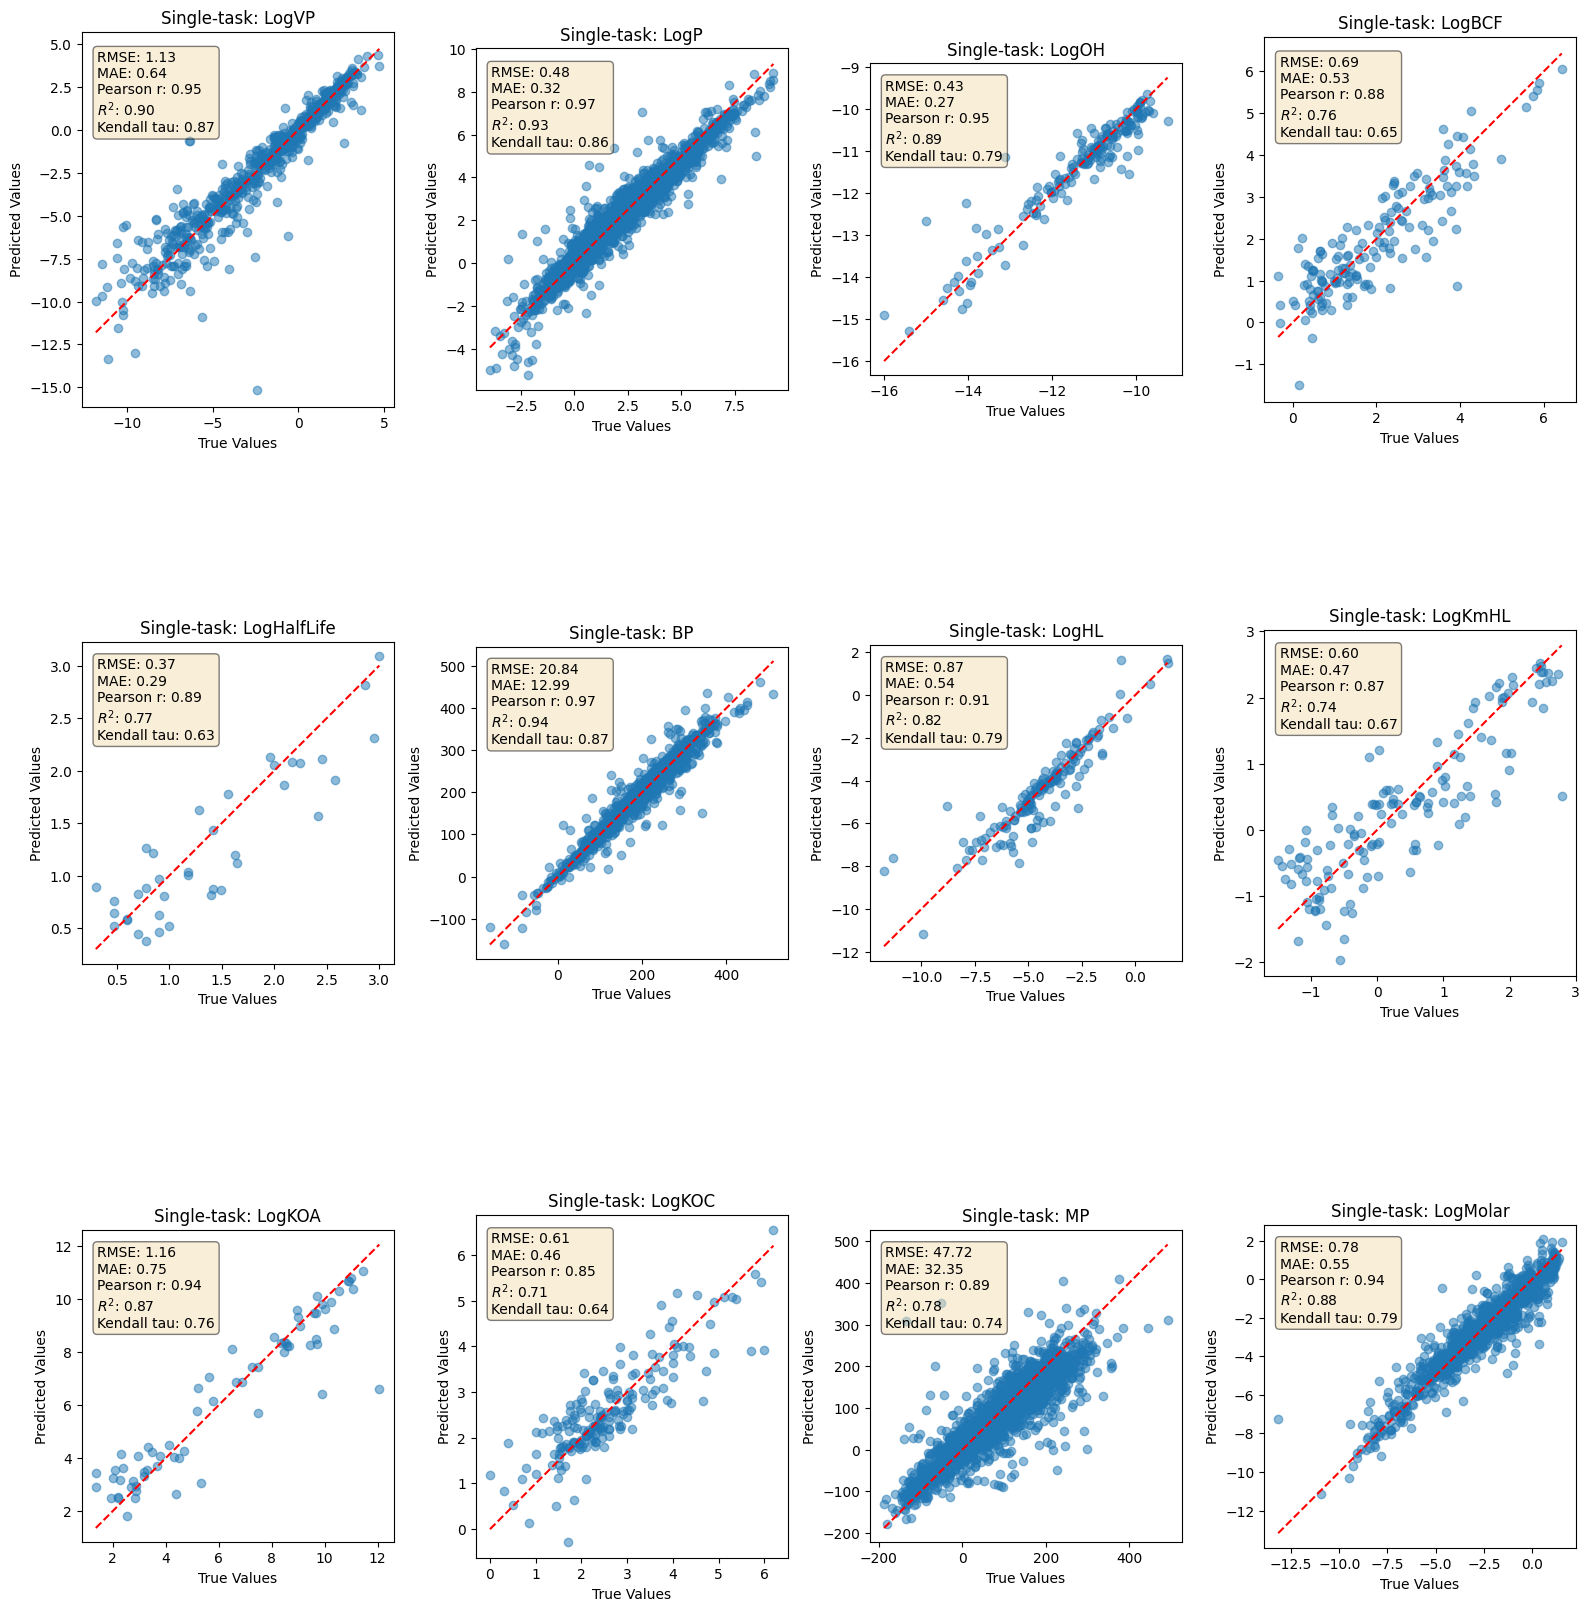

In [6]:
from modules.plotting import plot_scatter_and_line
import matplotlib.pyplot as plt

single_task_dfs = [pd.read_csv(f'chemprop_out/{prop}_0.csv') for prop in properties]

cols = 4
rows = len(single_task_dfs) // cols

fig, axs = plt.subplots(rows, cols, figsize=(16, rows * 6))
axs = axs.flatten()

for i, prop in enumerate(properties):
    # Prepare data for single-task
    single_task_df = single_task_dfs[i]
    valid_single = single_task_df[['SMILES', prop, 'pred_0']].dropna()
    true_single_values = valid_single[prop]
    pred_single_values = valid_single['pred_0']

    # Plotting single-task
    plot_scatter_and_line(axs[i], true_single_values, pred_single_values, f'Single-task: {prop}')

plt.tight_layout()

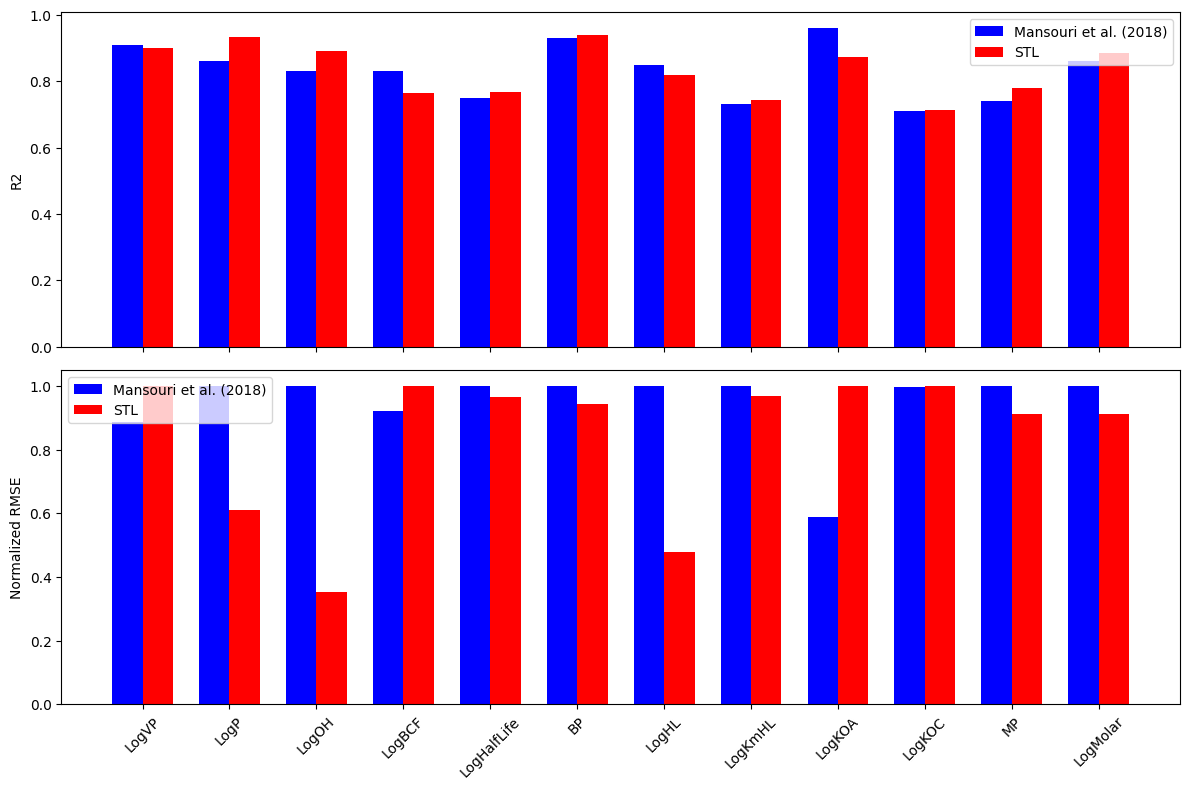

In [7]:
# Comparison with models from Mansouri et al. (2018)
from sklearn.metrics import mean_squared_error, r2_score

STL_results = {
    "Property": properties,
    "R2": [],
    "RMSE": []
}

for prop in properties:
    single_task_df = pd.read_csv(f'chemprop_out/{prop}_0.csv')
    valid_single = single_task_df[['SMILES', prop, 'pred_0']].dropna()
    true_values = valid_single[prop]
    pred_values = valid_single['pred_0']
    
    rmse = np.sqrt(mean_squared_error(true_values, pred_values))
    r2 = r2_score(true_values, pred_values)
    STL_results["R2"].append(r2)
    STL_results["RMSE"].append(rmse)

STL_results = pd.DataFrame(STL_results)
STL_results.set_index('Property', inplace=True)

mansouri_results = {
    "Property": ["LogVP", "LogP", "LogOH", "LogBCF", "LogHalfLife", "BP", "LogHL", "LogKmHL", "LogKOA", "LogKOC", "MP", "LogMolar"],
    "R2": [0.91, 0.86, 0.83, 0.83, 0.75, 0.93, 0.85, 0.73, 0.96, 0.71, 0.74, 0.86],
    "RMSE": [1, 0.78, 1.23, 0.64, 0.38, 22.08, 1.82, 0.62, 0.68, 0.61, 52.27, 0.86]
}

mansouri = pd.DataFrame(mansouri_results)
mansouri.set_index('Property', inplace=True)

# Normalize the RMSE values in both datasets (make the largest RMSE of the two methods equal to 1 for each property)
for prop in properties:
    max_rmse = max(STL_results.loc[prop, 'RMSE'], mansouri.loc[prop, 'RMSE'])
    STL_results.loc[prop, 'RMSE'] /= max_rmse
    mansouri.loc[prop, 'RMSE'] /= max_rmse 

# Create figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

# Plotting R2 values
width = 0.35  # the width of the bars
r1 = np.arange(len(properties))
r2 = [x + width for x in r1]

ax[0].bar(r1, mansouri['R2'], color='b', width=width, label='Mansouri et al. (2018)')
ax[0].bar(r2, STL_results['R2'], color='r', width=width, label='STL')
ax[0].set_ylabel('R2')
ax[0].set_xticks([r + width/2 for r in range(len(properties))])
ax[0].set_xticklabels(properties, rotation=45)
ax[0].legend()

# Plotting RMSE values
ax[1].bar(r1, mansouri['RMSE'], color='b', width=width, label='Mansouri et al. (2018)')
ax[1].bar(r2, STL_results['RMSE'], color='r', width=width, label='STL')
ax[1].set_ylabel('Normalized RMSE')
ax[1].set_xticks([r + width/2 for r in range(len(properties))])
ax[1].set_xticklabels(properties, rotation=45)
ax[1].legend()

# Show plot
plt.tight_layout()